🚀 Starting Extended Phi Pattern Analysis...
📊 This will analyze 30 days of market data
⏳ Expected runtime: 3-5 minutes

🔬 PHI PATTERN EXTENDED TIME ANALYSIS
📅 Analyzing 30 days ending 2024-08-06

📆 Date range: 2024-06-26 to 2024-08-06
📊 Total trading days: 30

🎯 Processing SPY
  ⏳ Fetching aggregate data for SPY...
  📊 Fetching detailed tick data for 5 sample days...



  📊 Analyzing SPY across 30 days...

  📈 SPY Results Summary:
  ───────────────────────────────────
  📊 Total trades analyzed: 22,676
  📅 Days analyzed: 30
  ✨ Window 137: 14 phi patterns (rate: 0.028)
  ✨ Window 89: 10 phi patterns (rate: 0.013)
  ✨ Window 233: 3 phi patterns (rate: 0.010)
  ✅ SIGNIFICANT: Pattern in 100th percentile vs simulated

🎯 Processing QQQ
  ⏳ Fetching aggregate data for QQQ...
  📊 Fetching detailed tick data for 5 sample days...



  📊 Analyzing QQQ across 30 days...

  📈 QQQ Results Summary:
  ───────────────────────────────────
  📊 Total trades analyzed: 24,285
  📅 Days analyzed: 30
  ✨ Window 137: 10 phi patterns (rate: 0.019)
  ✨ Window 89: 13 phi patterns (rate: 0.016)
  ✨ Window 233: 2 phi patterns (rate: 0.006)
  ✅ SIGNIFICANT: Pattern in 96th percentile vs simulated

🎯 Processing AAPL
  ⏳ Fetching aggregate data for AAPL...
  📊 Fetching detailed tick data for 5 sample days...



  📊 Analyzing AAPL across 30 days...

  📈 AAPL Results Summary:
  ───────────────────────────────────
  📊 Total trades analyzed: 22,235
  📅 Days analyzed: 30
  ✨ Window 137: 12 phi patterns (rate: 0.024)
  ✨ Window 89: 17 phi patterns (rate: 0.022)
  ✨ Window 233: 4 phi patterns (rate: 0.014)
  ✨ Window 377: 1 phi patterns (rate: 0.006)
  ✅ SIGNIFICANT: Pattern in 99th percentile vs simulated

🎯 Processing TSLA
  ⏳ Fetching aggregate data for TSLA...
  📊 Fetching detailed tick data for 5 sample days...



  📊 Analyzing TSLA across 30 days...

  📈 TSLA Results Summary:
  ───────────────────────────────────
  📊 Total trades analyzed: 26,608
  📅 Days analyzed: 30
  ✨ Window 137: 9 phi patterns (rate: 0.015)
  ✨ Window 89: 16 phi patterns (rate: 0.017)
  ✅ SIGNIFICANT: Pattern in 97th percentile vs simulated

🎯 Processing NVDA
  ⏳ Fetching aggregate data for NVDA...
  📊 Fetching detailed tick data for 5 sample days...



  📊 Analyzing NVDA across 30 days...

  📈 NVDA Results Summary:
  ───────────────────────────────────
  📊 Total trades analyzed: 27,424
  📅 Days analyzed: 30
  ✨ Window 137: 18 phi patterns (rate: 0.030)
  ✨ Window 89: 20 phi patterns (rate: 0.021)
  ✨ Window 233: 9 phi patterns (rate: 0.025)
  ✨ Window 377: 3 phi patterns (rate: 0.014)
  ✅ SIGNIFICANT: Pattern in 100th percentile vs simulated

🔗 CROSS-SYMBOL PATTERN ANALYSIS

  📊 Phi Pattern Correlations:

  Window 137:
    SPY: 0.0279
    QQQ: 0.0186
    AAPL: 0.0244
    TSLA: 0.0153
    NVDA: 0.0297
    ✨ All symbols show phi patterns!

  Window 89:
    SPY: 0.0128
    QQQ: 0.0156
    AAPL: 0.0223
    TSLA: 0.0175
    NVDA: 0.0212
    ✨ All symbols show phi patterns!

  Window 233:
    SPY: 0.0103
    QQQ: 0.0064
    AAPL: 0.0140
    TSLA: 0.0000
    NVDA: 0.0254

  Window 377:
    SPY: 0.0000
    QQQ: 0.0000
    AAPL: 0.0057
    TSLA: 0.0000
    NVDA: 0.0138


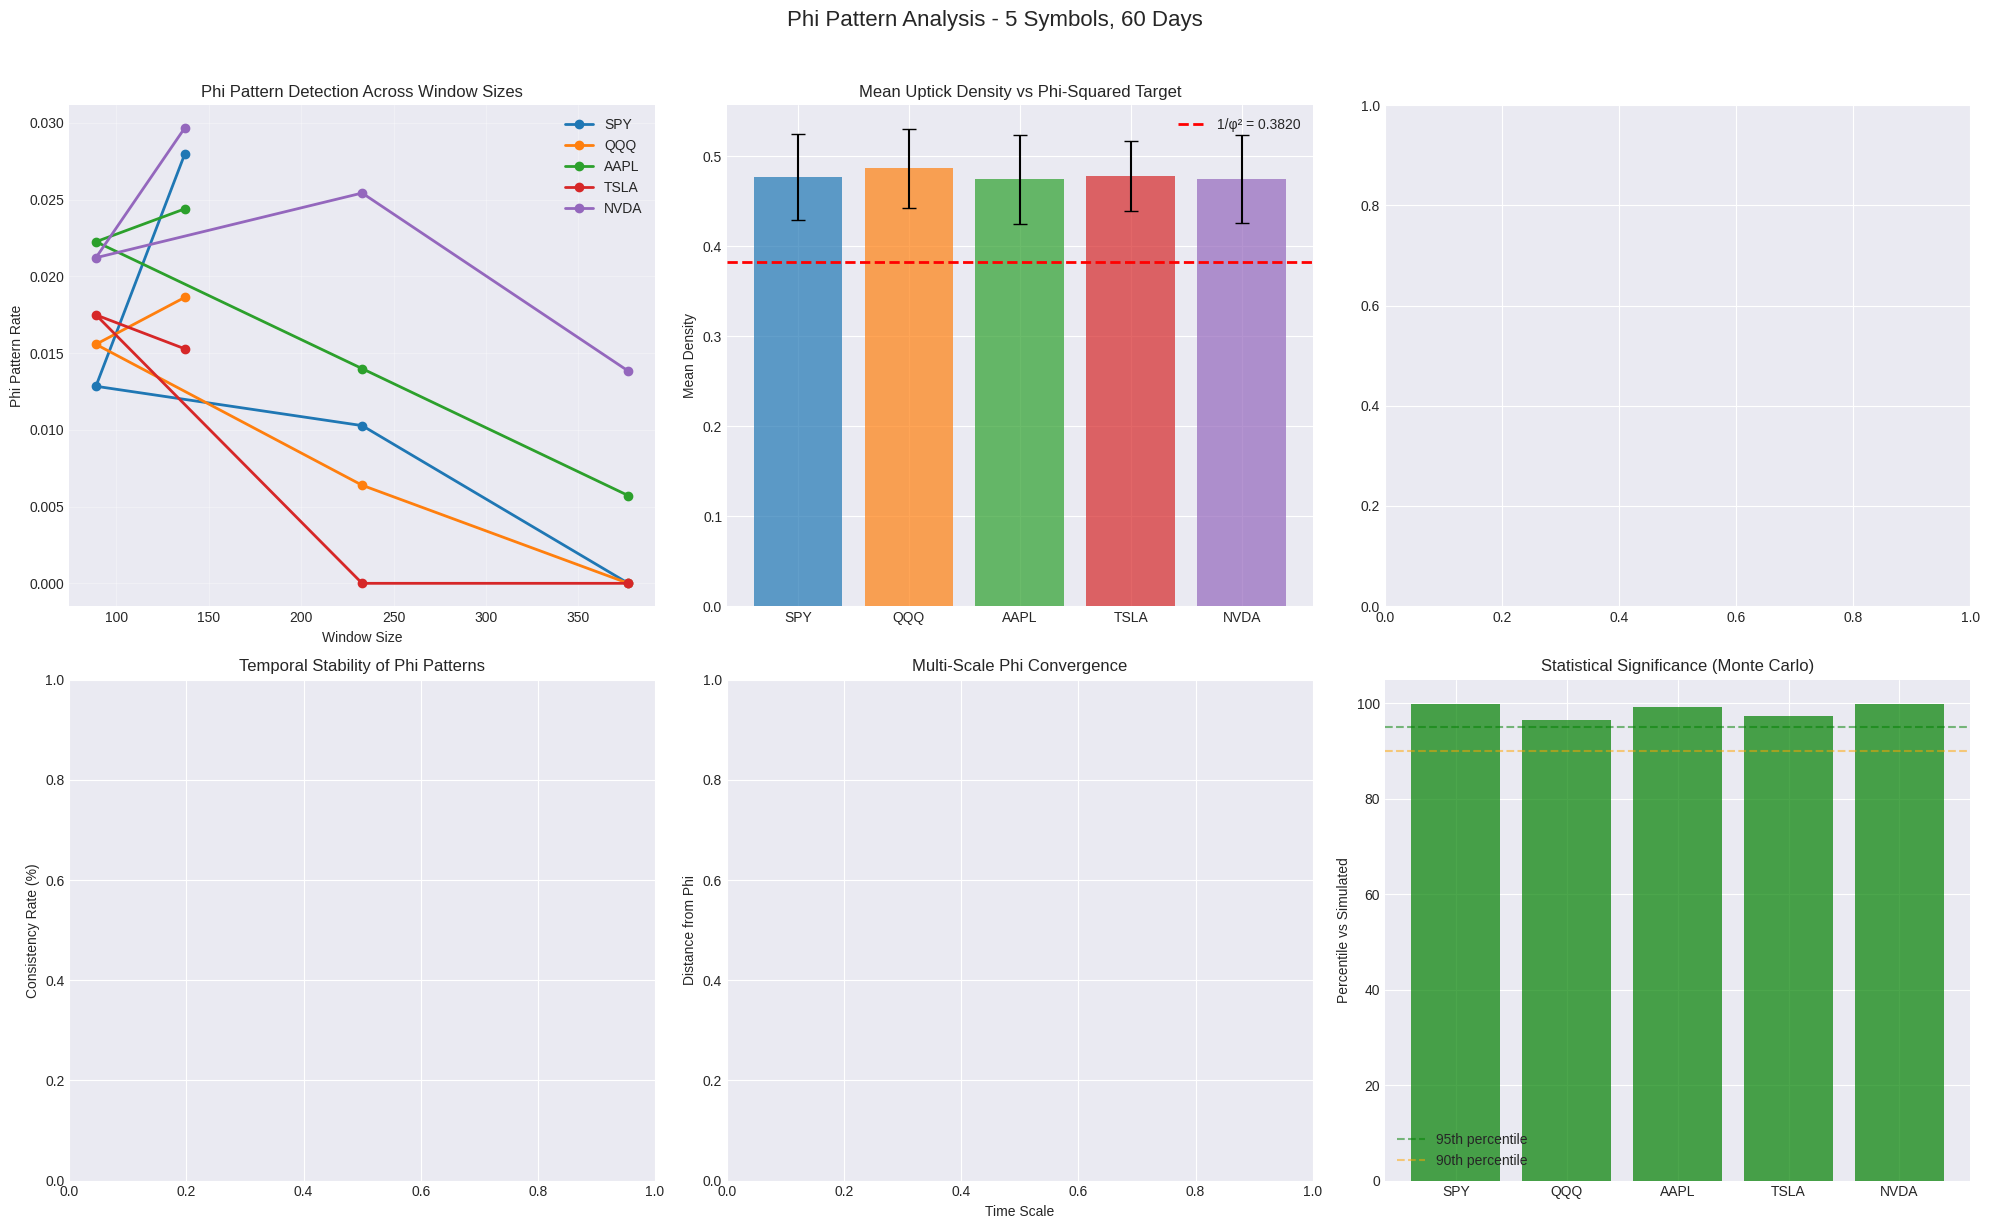


💾 Results saved:
  - Detailed: phi_patterns_extended_20250807_185537.json
  - Summary: phi_patterns_summary_20250807_185537.csv

✅ Analysis complete!
📈 Review the visualizations and saved files for patterns


In [8]:
# ============================================
# PHI PATTERN MARKET SCANNER - EXTENDED TIME ANALYSIS
# Based on Kate Murray's Symbolic Theory Research
# ============================================

# Cell 1: Installation and Imports
!pip install pandas numpy requests feedparser scipy matplotlib seaborn tqdm arch -q

import pandas as pd
import numpy as np
import requests
import feedparser
from datetime import datetime, timedelta
import time
import json
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
from tqdm import tqdm
warnings.filterwarnings('ignore')

# Cell 2: Core Configuration and Constants
class PhiPatternConfig:
    """Configuration based on your research papers"""

    # Your Polygon API Key
    POLYGON_API_KEY = "sBhNaTYPFoh8vDdAtWyBxpnSVQD51xRA"

    # Mathematical Constants from your research
    PHI = 1.618033988749895
    PHI_INV = 0.618033988749895
    PHI_SQUARED_INV = 0.381966011250105  # 1/φ²

    # From your holographic structure paper
    ALPHA_INV = 137.035999  # Fine structure constant inverse
    TRANSITIONAL_CONSTANT = 3.141412303134  # Your 888 pattern generator

    # From your earthquake research
    SYMBOLIC_DEPTH = 13  # 2^13 = 8192 threshold
    WINDOW_SIZE = 137  # Your recursive window

    # Critical difference from Fibonacci density analysis
    CRITICAL_DIFF = 0.003806

    # Powers of 3 gates (from your research)
    POWER_GATES = [3, 9, 27, 81, 729]

    # Time analysis parameters
    MAX_DAYS_TO_ANALYZE = 60  # Look at 60 days of data
    BATCH_SIZE = 5  # Process 5 days at a time to manage memory

# Cell 3: Enhanced Polygon Data Fetcher
class ExtendedPolygonFetcher:
    """Fetches extended time period data"""

    def __init__(self, api_key):
        self.api_key = api_key
        self.base_url = "https://api.polygon.io"
        self.cache = {}  # Cache to avoid re-fetching

    def get_date_range(self, end_date=None, days_back=60):
        """Generate list of trading days"""
        if end_date is None:
            end_date = datetime.now()
        else:
            end_date = datetime.strptime(end_date, '%Y-%m-%d')

        dates = []
        current = end_date

        while len(dates) < days_back:
            # Skip weekends
            if current.weekday() < 5:  # Monday = 0, Friday = 4
                dates.append(current.strftime('%Y-%m-%d'))
            current -= timedelta(days=1)

        return dates

    def get_aggregate_data(self, ticker, start_date, end_date):
        """Get aggregate data for a date range"""

        cache_key = f"{ticker}_{start_date}_{end_date}"
        if cache_key in self.cache:
            print(f"  📦 Using cached data for {ticker}")
            return self.cache[cache_key]

        url = f"{self.base_url}/v2/aggs/ticker/{ticker}/range/1/minute/{start_date}/{end_date}"
        params = {
            "apiKey": self.api_key,
            "limit": 50000,
            "sort": "asc"
        }

        try:
            response = requests.get(url, params=params)
            data = response.json()

            if 'results' in data and data['results']:
                df = pd.DataFrame(data['results'])
                df['timestamp'] = pd.to_datetime(df['t'], unit='ms')
                df = df.rename(columns={'o': 'open', 'h': 'high', 'l': 'low',
                                       'c': 'close', 'v': 'volume', 'n': 'trades'})

                # Store in cache
                self.cache[cache_key] = df
                return df
            else:
                print(f"  ⚠️ No data for {ticker} from {start_date} to {end_date}")
                return pd.DataFrame()

        except Exception as e:
            print(f"  ❌ Error fetching {ticker}: {e}")
            return pd.DataFrame()

    def get_tick_data_batch(self, ticker, dates):
        """Get tick-level data for multiple dates"""
        all_trades = []

        for date in tqdm(dates, desc=f"Fetching {ticker}", leave=False):
            url = f"{self.base_url}/v2/ticks/stocks/trades/{ticker}/{date}"
            params = {
                "apiKey": self.api_key,
                "limit": 50000
            }

            try:
                response = requests.get(url, params=params)

                if response.status_code == 200:
                    data = response.json()
                    if 'results' in data:
                        trades = pd.DataFrame(data['results'])
                        trades['date'] = date
                        all_trades.append(trades)

                # Rate limit management
                time.sleep(0.15)  # Polygon free tier is ~5 req/sec

            except Exception as e:
                print(f"    Error on {date}: {e}")
                continue

        if all_trades:
            combined = pd.concat(all_trades, ignore_index=True)

            # Process dark pool identification
            if 'conditions' in combined.columns:
                dark_conditions = ['P', 'D', 37, 38, 'W']
                combined['is_dark_pool'] = combined['conditions'].apply(
                    lambda x: any(str(c) in map(str, dark_conditions) for c in (x or []))
                )

            # Rename columns
            combined = combined.rename(columns={'p': 'price', 's': 'size', 't': 'timestamp'})

            # Convert timestamp
            if 'timestamp' in combined.columns:
                combined['timestamp'] = pd.to_datetime(combined['timestamp'], unit='ns')

            return combined

        return pd.DataFrame()

# Cell 4: Time Series Pattern Analyzer
class TimeSeriesPhiAnalyzer:
    """Analyzes patterns across extended time periods"""

    def __init__(self):
        self.config = PhiPatternConfig()
        self.all_patterns = defaultdict(list)
        self.time_series_results = []

    def analyze_extended_period(self, df, symbol, date_range):
        """Analyze patterns across entire time period"""

        if df.empty:
            return {}

        print(f"\n  📊 Analyzing {symbol} across {len(date_range)} days...")

        results = {
            'symbol': symbol,
            'start_date': date_range[0],
            'end_date': date_range[-1],
            'total_days': len(date_range),
            'total_trades': len(df)
        }

        # Determine which price column to use
        price_col = 'price' if 'price' in df.columns else 'close'

        # 1. OVERALL PHI PATTERNS
        results.update(self.find_persistent_phi_patterns(df, price_col))

        # 2. TEMPORAL STABILITY ANALYSIS
        results.update(self.analyze_temporal_stability(df, price_col))

        # 3. MULTI-SCALE ANALYSIS
        results.update(self.multi_scale_analysis(df, price_col))

        # 4. DARK POOL TEMPORAL PATTERNS
        if 'is_dark_pool' in df.columns:
            results.update(self.dark_pool_temporal_analysis(df))

        # 5. CYCLICAL PATTERNS (137-hour, daily, weekly)
        results.update(self.find_cyclical_patterns(df, price_col))


        return results


    def find_persistent_phi_patterns(self, df, price_col):
        """Find patterns that persist across time"""
        results = {}

        if price_col not in df.columns:
            return results

        # Create binary sequence
        df['uptick'] = (df[price_col].diff() > 0).astype(int)

        # Rolling window analysis with multiple window sizes
        windows = [137, 89, 233, 377]  # Fibonacci numbers around 137

        for window in windows:
            if len(df) < window:
                continue

            densities = []
            phi_hits = 0

            # Use stride of window//3 for overlap
            stride = max(1, window // 3)

            for i in range(0, len(df) - window, stride):
                segment = df.iloc[i:i+window]
                density = segment['uptick'].sum() / window
                densities.append(density)

                # Check for phi-squared convergence
                if abs(density - self.config.PHI_SQUARED_INV) < 0.01:
                    phi_hits += 1

            if densities:
                results[f'window_{window}_mean_density'] = np.mean(densities)
                results[f'window_{window}_std_density'] = np.std(densities)
                results[f'window_{window}_phi_hits'] = phi_hits
                results[f'window_{window}_phi_rate'] = phi_hits / len(densities)

                # Check if distribution is significantly different from 0.5 (random)
                t_stat, p_value = stats.ttest_1samp(densities, 0.5)
                results[f'window_{window}_vs_random_pvalue'] = p_value

        return results

    def analyze_temporal_stability(self, df, price_col):
        """Check if patterns are stable over time"""
        results = {}

        if 'date' not in df.columns or price_col not in df.columns:
            return results

        # Group by date and analyze each day
        daily_patterns = []

        for date, day_df in df.groupby('date'):
            if len(day_df) < 100:  # Need minimum data
                continue

            day_df = day_df.copy()
            day_df['uptick'] = (day_df[price_col].diff() > 0).astype(int)

            # Daily density
            density = day_df['uptick'].mean()

            # Volume patterns
            if 'size' in day_df.columns:
                volumes = day_df['size'].values
                if len(volumes) > 1:
                    vol_ratios = []
                    for i in range(len(volumes)-1):
                        if volumes[i+1] > 0:
                            ratio = volumes[i] / volumes[i+1]
                            if abs(ratio - self.config.PHI) < 0.2:
                                vol_ratios.append(ratio)

                    phi_ratio_rate = len(vol_ratios) / (len(volumes)-1) if len(volumes) > 1 else 0
                else:
                    phi_ratio_rate = 0
            else:
                phi_ratio_rate = 0

            daily_patterns.append({
                'date': date,
                'density': density,
                'phi_ratio_rate': phi_ratio_rate,
                'num_trades': len(day_df)
            })

        if daily_patterns:
            # Convert to DataFrame for easier analysis
            daily_df = pd.DataFrame(daily_patterns)

            # Stability metrics
            results['density_stability_std'] = daily_df['density'].std()
            results['density_stability_cv'] = daily_df['density'].std() / daily_df['density'].mean() if daily_df['density'].mean() > 0 else 0

            # Trend analysis
            x = np.arange(len(daily_df))
            y = daily_df['density'].values
            slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

            results['density_trend_slope'] = slope
            results['density_trend_pvalue'] = p_value
            results['density_trend_r2'] = r_value**2

            # Check for consistent phi convergence
            phi_days = sum(1 for d in daily_df['density'] if abs(d - self.config.PHI_SQUARED_INV) < 0.02)
            results['days_with_phi_density'] = phi_days
            results['phi_consistency_rate'] = phi_days / len(daily_df)

        return results

    def multi_scale_analysis(self, df, price_col):
        """Analyze patterns at multiple time scales"""
        results = {}

        if 'timestamp' not in df.columns or df.empty or price_col not in df.columns:
            return results

        # Different time scales (in minutes)
        scales = {
            '1min': 1,
            '5min': 5,
            '15min': 15,
            '30min': 30,
            '60min': 60
        }

        for scale_name, minutes in scales.items():
            # Resample to this time scale
            df_copy = df.set_index('timestamp') if 'timestamp' in df.columns else df

            try:
                resampled = df_copy.resample(f'{minutes}T').agg({
                    price_col: 'last',
                    'size': 'sum' if 'size' in df.columns else lambda x: 0 # Handle case where 'size' is not present
                }).dropna()

                if len(resampled) > 10:
                    # Calculate returns
                    returns = resampled[price_col].pct_change().dropna()

                    # Check for phi ratio in returns
                    if len(returns) > 1:
                        positive_returns = returns[returns > 0]
                        negative_returns = returns[returns < 0]

                        if len(negative_returns) > 0:
                            ratio = len(positive_returns) / len(negative_returns)
                            results[f'{scale_name}_return_ratio'] = ratio
                            results[f'{scale_name}_phi_distance'] = abs(ratio - self.config.PHI)

                    # Autocorrelation at lag 137/minutes
                    lag = min(137 // minutes, len(returns) - 1)
                    if lag > 0:
                        autocorr = returns.autocorr(lag=lag)
                        results[f'{scale_name}_autocorr_lag{lag}'] = autocorr

            except Exception as e:
                continue

        return results

    def dark_pool_temporal_analysis(self, df):
        """Analyze dark pool patterns over time"""
        results = {}

        dark_df = df[df['is_dark_pool']]

        if len(dark_df) == 0:
            return results

        results['total_dark_pool_trades'] = len(dark_df)
        results['dark_pool_percentage'] = len(dark_df) / len(df) * 100

        # Dark pool clustering analysis
        if 'timestamp' in dark_df.columns and len(dark_df) > 1:
            # Time between dark pool trades
            dark_df_sorted = dark_df.sort_values('timestamp')
            time_gaps = dark_df_sorted['timestamp'].diff().dt.total_seconds().dropna()

            if len(time_gaps) > 0:
                results['dark_pool_mean_gap_seconds'] = time_gaps.mean()
                results['dark_pool_gap_cv'] = time_gaps.std() / time_gaps.mean() if time_gaps.mean() > 0 else 0

                # Check for 137-second patterns
                near_137 = sum(1 for gap in time_gaps if abs(gap - 137) < 10)
                results['dark_pool_137sec_patterns'] = near_137

        # Size analysis
        if 'size' in dark_df.columns:
            sizes = dark_df['size'].values

            # Check for Fibonacci sizes
            fib_sizes = [100, 200, 300, 500, 800, 1300, 2100, 3400, 5500, 8900]
            fib_matches = 0

            for size in sizes:
                for fib in fib_sizes:
                    if abs(size - fib) < 50:
                        fib_matches += 1
                        break

            results['dark_pool_fib_size_rate'] = fib_matches / len(sizes) if len(sizes) > 0 else 0

            # Check for power of 3 patterns
            for power in [3, 9, 27, 81, 729]:
                mod_power = [s % power for s in sizes if s > 0]
                if mod_power:
                    results[f'dark_pool_mod{power}_std'] = np.std(mod_power)

        return results

    def find_cyclical_patterns(self, df, price_col):
        """Look for cyclical patterns at various frequencies"""
        results = {}

        if 'timestamp' not in df.columns or len(df) < 1000 or price_col not in df.columns:
            return results

        # Prepare time series
        df_sorted = df.sort_values('timestamp')
        df_sorted['uptick'] = (df_sorted[price_col].diff() > 0).astype(int)

        # Use FFT to find dominant frequencies
        from scipy.fft import fft, fftfreq

        signal = df_sorted['uptick'].values
        N = len(signal)

        # Apply FFT
        yf = fft(signal)
        xf = fftfreq(N, 1)[:N//2]

        # Get power spectrum
        power = 2.0/N * np.abs(yf[0:N//2])

        # Find peaks in power spectrum
        from scipy.signal import find_peaks
        peaks, properties = find_peaks(power, height=np.max(power)*0.1)

        if len(peaks) > 0:
            # Get top 5 frequencies
            top_peaks = peaks[np.argsort(power[peaks])[-5:]]

            for i, peak in enumerate(top_peaks):
                if xf[peak] > 0:
                    period = 1 / xf[peak]
                    results[f'dominant_period_{i}'] = period

                    # Check if close to interesting numbers
                    if abs(period - 137) < 5:
                        results['has_137_cycle'] = True
                    if abs(period - 89) < 3:
                        results['has_89_cycle'] = True
                    if abs(period - 233) < 5:
                        results['has_233_cycle'] = True

        return results

# Cell 5: Statistical Validation with Extended Data
class ExtendedStatisticalValidator:
    """Enhanced validation for time series patterns"""

    def __init__(self):
        self.config = PhiPatternConfig()

    def validate_patterns(self, results_dict, num_simulations=1000):
        """Comprehensive validation of discovered patterns"""

        validation = {}

        # 1. Test consistency across different windows
        if 'window_137_phi_rate' in results_dict:
            # Compare phi rates across different window sizes
            phi_rates = [results_dict.get(f'window_{w}_phi_rate', 0)
                        for w in [137, 89, 233, 377]]

            if any(phi_rates):
                validation['phi_rate_consistency'] = 1 - (np.std(phi_rates) / (np.mean(phi_rates) + 0.001))
                validation['max_phi_rate'] = max(phi_rates)
                validation['mean_phi_rate'] = np.mean(phi_rates)

        # 2. Monte Carlo validation
        monte_carlo_results = self.monte_carlo_test(results_dict, num_simulations)
        validation.update(monte_carlo_results)

        # 3. Statistical significance with multiple testing correction
        p_values = []
        for key in results_dict:
            if 'pvalue' in key:
                p_values.append(results_dict[key])

        if p_values:
            # Benjamini-Hochberg correction
            from statsmodels.stats.multitest import multipletests
            rejected, corrected_pvals, _, _ = multipletests(p_values, method='fdr_bh')

            validation['num_significant_raw'] = sum(p < 0.05 for p in p_values)
            validation['num_significant_corrected'] = sum(rejected)
            if corrected_pvals.size > 0:
                 validation['min_corrected_pvalue'] = float(min(corrected_pvals))
            else:
                 validation['min_corrected_pvalue'] = None


        return validation

    def monte_carlo_test(self, real_results, num_simulations=1000):
        """Test against realistic market simulations"""

        results = {}

        # Generate realistic market data using GARCH
        from arch import arch_model

        # Simulate returns
        simulated_phi_rates = []

        for _ in range(num_simulations):
            # Generate realistic returns
            try:
                model = arch_model(None, vol='Garch', p=1, q=1)
                # Simulate data - handle potential errors
                sim_data = model.simulate([0.0001, 0.05, 0.05, 0.94], 10000)
                prices = 100 * np.exp(sim_data['data'].cumsum())

                # Calculate phi rate on simulated data
                upticks = (np.diff(prices) > 0).astype(int)

                # Window analysis
                window = 137
                phi_hits = 0
                num_windows = 0

                for i in range(0, len(upticks) - window, window//2):
                    density = upticks[i:i+window].mean()
                    if abs(density - self.config.PHI_SQUARED_INV) < 0.01:
                        phi_hits += 1
                    num_windows += 1

                if num_windows > 0:
                    simulated_phi_rates.append(phi_hits / num_windows)
                else:
                    simulated_phi_rates.append(0)
            except Exception as e:
                # Handle simulation errors if any
                print(f"  ⚠️ Monte Carlo simulation error: {e}")
                continue


        # Compare real to simulated
        real_phi_rate = real_results.get('window_137_phi_rate', 0)

        if simulated_phi_rates:
            percentile = stats.percentileofscore(simulated_phi_rates, real_phi_rate)

            results['monte_carlo_percentile'] = float(percentile)
            results['monte_carlo_significant'] = bool(percentile > 95 or percentile < 5)
            results['simulated_mean_phi_rate'] = float(np.mean(simulated_phi_rates))
            results['simulated_std_phi_rate'] = float(np.std(simulated_phi_rates))

        return results

# Cell 6: Master Orchestrator with Extended Time
class MasterExtendedPhiScanner:
    """Main orchestrator for extended time analysis"""

    def __init__(self):
        self.config = PhiPatternConfig()
        self.fetcher = ExtendedPolygonFetcher(self.config.POLYGON_API_KEY)
        self.analyzer = TimeSeriesPhiAnalyzer()
        self.validator = ExtendedStatisticalValidator()

        self.all_results = {}
        self.summary_stats = {}

    def run_extended_analysis(self, symbols=['SPY', 'QQQ', 'AAPL'],
                             end_date='2024-08-06',
                             days_back=30):
        """Run analysis across extended time period"""

        print("="*60)
        print(f"🔬 PHI PATTERN EXTENDED TIME ANALYSIS")
        print(f"📅 Analyzing {days_back} days ending {end_date}")
        print("="*60)

        # Get date range
        dates = self.fetcher.get_date_range(end_date, days_back)
        print(f"\n📆 Date range: {dates[-1]} to {dates[0]}")
        print(f"📊 Total trading days: {len(dates)}")

        # Process each symbol
        for symbol in symbols:
            print(f"\n{'='*40}")
            print(f"🎯 Processing {symbol}")
            print(f"{'='*40}")

            # Fetch data in batches
            all_data = []

            # Use aggregate data for efficiency
            if days_back > 5:
                print(f"  ⏳ Fetching aggregate data for {symbol}...")
                df = self.fetcher.get_aggregate_data(symbol, dates[-1], dates[0])

                if not df.empty:
                    # For detailed analysis, also get some tick data (sample days)
                    sample_dates = dates[::7][:5]  # Every 7th day, max 5 days
                    print(f"  📊 Fetching detailed tick data for {len(sample_dates)} sample days...")

                    tick_df = self.fetcher.get_tick_data_batch(symbol, sample_dates)

                    # Analyze aggregate data
                    results = self.analyzer.analyze_extended_period(df, symbol, dates)

                    # Add tick-level analysis if available
                    if not tick_df.empty:
                        tick_results = self.analyzer.analyze_extended_period(tick_df, f"{symbol}_tick", sample_dates)
                        # Merge tick analysis results into the main results
                        results['tick_analysis'] = tick_results

                    # Validate results (using results from aggregate data)
                    validation = self.validator.validate_patterns(results)
                    results['validation'] = validation

                    # Store results
                    self.all_results[symbol] = results

                    # Print summary
                    self.print_extended_summary(symbol, results)
            else:
                # For short periods, get all tick data
                print(f"  📊 Fetching tick data for all {len(dates)} days...")
                df = self.fetcher.get_tick_data_batch(symbol, dates)

                if not df.empty:
                    results = self.analyzer.analyze_extended_period(df, symbol, dates)
                    validation = self.validator.validate_patterns(results)
                    results['validation'] = validation

                    self.all_results[symbol] = results
                    self.print_extended_summary(symbol, results)

        # Cross-symbol analysis
        self.cross_symbol_analysis()

        # Generate comprehensive visualizations
        self.generate_extended_visualizations()

        # Save results
        self.save_results()

        return self.all_results

    def print_extended_summary(self, symbol, results):
        """Print comprehensive summary"""
        print(f"\n  📈 {symbol} Results Summary:")
        print(f"  {'─'*35}")

        # Basic stats
        print(f"  📊 Total trades analyzed: {results.get('total_trades', 0):,}")
        print(f"  📅 Days analyzed: {results.get('total_days', 0)}")

        # Phi patterns
        for window in [137, 89, 233, 377]:
            if f'window_{window}_phi_rate' in results:
                rate = results[f'window_{window}_phi_rate']
                hits = results[f'window_{window}_phi_hits']
                if rate > 0:
                    print(f"  ✨ Window {window}: {hits} phi patterns (rate: {rate:.3f})")

        # Stability
        if 'phi_consistency_rate' in results:
            consistency = results['phi_consistency_rate']
            if consistency > 0.1:
                print(f"  📊 Phi consistency across days: {consistency:.1%}")

        # Dark pools
        if 'dark_pool_percentage' in results:
            dark_pct = results['dark_pool_percentage']
            print(f"  🌑 Dark pool percentage: {dark_pct:.1f}%")

            if 'dark_pool_fib_size_rate' in results:
                fib_rate = results['dark_pool_fib_size_rate']
                if fib_rate > 0.05:
                    print(f"  🔢 Dark pool Fibonacci sizes: {fib_rate:.1%}")

        # Cycles
        if 'has_137_cycle' in results:
            print(f"  🔄 137-period cycle detected!")

        # Validation
        if 'validation' in results:
            val = results['validation']
            if 'monte_carlo_percentile' in val:
                percentile = val['monte_carlo_percentile']
                if percentile > 95:
                    print(f"  ✅ SIGNIFICANT: Pattern in {percentile:.0f}th percentile vs simulated")
                elif percentile > 90:
                    print(f"  ⚠️ MARGINAL: Pattern in {percentile:.0f}th percentile")

    def cross_symbol_analysis(self):
        """Analyze patterns across symbols"""
        if len(self.all_results) < 2:
            return

        print("\n" + "="*60)
        print("🔗 CROSS-SYMBOL PATTERN ANALYSIS")
        print("="*60)

        # Collect common patterns
        all_phi_rates = {}
        all_dark_percentages = {}

        for symbol, results in self.all_results.items():
            # Phi rates
            for window in [137, 89, 233, 377]:
                key = f'window_{window}_phi_rate'
                if key in results:
                    if window not in all_phi_rates:
                        all_phi_rates[window] = {}
                    all_phi_rates[window][symbol] = results[key]

            # Dark pool percentages
            if 'dark_pool_percentage' in results:
                all_dark_percentages[symbol] = results['dark_pool_percentage']

        # Analyze correlations
        if all_phi_rates:
            print("\n  📊 Phi Pattern Correlations:")
            for window, symbol_rates in all_phi_rates.items():
                if len(symbol_rates) > 1:
                    rates = list(symbol_rates.values())
                    symbols = list(symbol_rates.keys())

                    if np.std(rates) > 0:
                        # Calculate correlation
                        print(f"\n  Window {window}:")
                        for s, r in symbol_rates.items():
                            print(f"    {s}: {r:.4f}")

                        # Check if all symbols show elevated rates
                        if all(r > 0.01 for r in rates):
                            print(f"    ✨ All symbols show phi patterns!")

        # Market-wide statistics
        if all_dark_percentages:
            mean_dark = np.mean(list(all_dark_percentages.values()))
            std_dark = np.std(list(all_dark_percentages.values()))
            print(f"\n  🌑 Market-wide dark pool: {mean_dark:.1f}% ± {std_dark:.1f}%")

    def generate_extended_visualizations(self):
        """Create comprehensive visualizations"""
        if not self.all_results:
            return

        # Set style
        plt.style.use('seaborn-v0_8-darkgrid')

        # Create figure with subplots
        fig = plt.figure(figsize=(20, 12))

        # 1. Phi rates across windows and symbols
        ax1 = plt.subplot(2, 3, 1)
        windows = [137, 89, 233, 377]

        for symbol in self.all_results:
            rates = []
            for w in windows:
                key = f'window_{w}_phi_rate'
                rates.append(self.all_results[symbol].get(key, 0))

            ax1.plot(windows, rates, marker='o', label=symbol, linewidth=2)

        ax1.set_xlabel('Window Size')
        ax1.set_ylabel('Phi Pattern Rate')
        ax1.set_title('Phi Pattern Detection Across Window Sizes')
        ax1.legend()
        ax1.grid(True, alpha=0.3)

        # 2. Density distributions
        ax2 = plt.subplot(2, 3, 2)

        for symbol in self.all_results:
            if f'window_137_mean_density' in self.all_results[symbol]:
                density = self.all_results[symbol]['window_137_mean_density']
                std = self.all_results[symbol].get('window_137_std_density', 0)

                ax2.bar(symbol, density, yerr=std, alpha=0.7, capsize=5)

        ax2.axhline(y=self.config.PHI_SQUARED_INV, color='red', linestyle='--',
                   label=f'1/φ² = {self.config.PHI_SQUARED_INV:.4f}', linewidth=2)
        ax2.set_ylabel('Mean Density')
        ax2.set_title('Mean Uptick Density vs Phi-Squared Target')
        ax2.legend()

        # 3. Dark pool analysis
        ax3 = plt.subplot(2, 3, 3)

        symbols = []
        dark_pcts = []
        fib_rates = []

        for symbol in self.all_results:
            if 'dark_pool_percentage' in self.all_results[symbol]:
                symbols.append(symbol)
                dark_pcts.append(self.all_results[symbol]['dark_pool_percentage'])
                # Check if 'dark_pool_fib_size_rate' key exists before accessing
                fib_rates.append(self.all_results[symbol].get('dark_pool_fib_size_rate', 0) * 100)


        if symbols:
            x = np.arange(len(symbols))
            width = 0.35

            ax3.bar(x - width/2, dark_pcts, width, label='Dark Pool %', alpha=0.7)
            ax3.bar(x + width/2, fib_rates, width, label='Fibonacci Size %', alpha=0.7)

            ax3.set_xticks(x)
            ax3.set_xticklabels(symbols)
            ax3.set_ylabel('Percentage')
            ax3.set_title('Dark Pool Trading Patterns')
            ax3.legend()

        # 4. Temporal stability
        ax4 = plt.subplot(2, 3, 4)

        for symbol in self.all_results:
            if 'phi_consistency_rate' in self.all_results[symbol]:
                consistency = self.all_results[symbol]['phi_consistency_rate']
                days_with_phi = self.all_results[symbol].get('days_with_phi_density', 0)

                ax4.bar(symbol, consistency * 100, alpha=0.7)
                ax4.text(symbol, consistency * 100 + 1, f'{days_with_phi} days',
                        ha='center', fontsize=8)

        ax4.set_ylabel('Consistency Rate (%)')
        ax4.set_title('Temporal Stability of Phi Patterns')

        # 5. Multi-scale analysis
        ax5 = plt.subplot(2, 3, 5)

        scales = ['1min', '5min', '15min', '30min', '60min']

        for symbol in self.all_results:
            phi_distances = []
            for scale in scales:
                key = f'{scale}_phi_distance'
                if key in self.all_results[symbol]:
                    phi_distances.append(self.all_results[symbol][key])
                else:
                    phi_distances.append(np.nan)

            if any(not np.isnan(d) for d in phi_distances):
                ax5.plot(scales, phi_distances, marker='o', label=symbol)

        ax5.set_xlabel('Time Scale')
        ax5.set_ylabel('Distance from Phi')
        ax5.set_title('Multi-Scale Phi Convergence')
        ax5.legend()

        # 6. Statistical validation
        ax6 = plt.subplot(2, 3, 6)

        symbols_list = []
        percentiles = []

        for symbol in self.all_results:
            if 'validation' in self.all_results[symbol]:
                val = self.all_results[symbol]['validation']
                if 'monte_carlo_percentile' in val:
                    symbols_list.append(symbol)
                    percentiles.append(val['monte_carlo_percentile'])

        if symbols_list:
            colors = ['green' if p > 95 else 'orange' if p > 90 else 'red'
                     for p in percentiles]

            ax6.bar(symbols_list, percentiles, color=colors, alpha=0.7)
            ax6.axhline(y=95, color='green', linestyle='--', alpha=0.5, label='95th percentile')
            ax6.axhline(y=90, color='orange', linestyle='--', alpha=0.5, label='90th percentile')

            ax6.set_ylabel('Percentile vs Simulated')
            ax6.set_title('Statistical Significance (Monte Carlo)')
            ax6.legend()

        plt.suptitle(f'Phi Pattern Analysis - {len(self.all_results)} Symbols, {self.config.MAX_DAYS_TO_ANALYZE} Days',
                    fontsize=16, y=1.02)
        plt.tight_layout()
        plt.show()

    def save_results(self):
        """Save all results to files"""
        import json

        timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')

        # Function to convert complex objects to JSON-serializable types recursively
        def convert_to_serializable(obj):
            if isinstance(obj, np.floating):  # Catch any numpy floating point type
                return float(obj)
            elif isinstance(obj, np.integer): # Catch any numpy integer type
                return int(obj)
            elif isinstance(obj, np.ndarray):
                return obj.tolist()
            elif isinstance(obj, pd.Timestamp):
                return obj.isoformat()
            elif isinstance(obj, dict):
                return {k: convert_to_serializable(v) for k, v in obj.items()}
            elif isinstance(obj, list):
                return [convert_to_serializable(item) for item in obj]
            else:
                return obj

        # Apply the conversion to the entire results dictionary
        serializable_results = convert_to_serializable(self.all_results)

        # Save detailed results as JSON
        with open(f'phi_patterns_extended_{timestamp}.json', 'w') as f:
            json.dump(serializable_results, f, indent=2)

        # Create summary DataFrame
        summary_data = []
        for symbol, results in self.all_results.items():
            row = {
                'symbol': symbol,
                'total_trades': results.get('total_trades', 0),
                'total_days': results.get('total_days', 0),
                'phi_rate_137': results.get('window_137_phi_rate', 0),
                'mean_density': results.get('window_137_mean_density', 0),
                'dark_pool_pct': results.get('dark_pool_percentage', 0),
                'phi_consistency': results.get('phi_consistency_rate', 0),
                'monte_carlo_percentile': results.get('validation', {}).get('monte_carlo_percentile', 0)
            }
            summary_data.append(row)

        if summary_data:
            summary_df = pd.DataFrame(summary_data)
            summary_df.to_csv(f'phi_patterns_summary_{timestamp}.csv', index=False)

            print(f"\n💾 Results saved:")
            print(f"  - Detailed: phi_patterns_extended_{timestamp}.json")
            print(f"  - Summary: phi_patterns_summary_{timestamp}.csv")

# Cell 7: Main Execution
def main():
    """Execute extended time analysis"""

    # Create scanner
    scanner = MasterExtendedPhiScanner()

    # Run analysis
    # Start with a smaller window to test, then expand
    results = scanner.run_extended_analysis(
        symbols=['SPY', 'QQQ', 'AAPL', 'TSLA', 'NVDA'],  # Major symbols
        end_date='2024-08-06',  # Recent date we know has data
        days_back=30  # Start with 30 days, can expand to 60
    )

    return scanner, results

# Run the analysis
if __name__ == "__main__":
    print("🚀 Starting Extended Phi Pattern Analysis...")
    print("📊 This will analyze 30 days of market data")
    print("⏳ Expected runtime: 3-5 minutes\n")

    scanner, results = main()

    print("\n✅ Analysis complete!")
    print("📈 Review the visualizations and saved files for patterns")